In [1]:
#Homework 3  Tanxin Liu


1.1 Download the Kirb21 data here. Pull out subject with rawid equal to kirby906a_ax.img. Do the following.

Calculate and report the intracranial volume (ICV) and the total brain volume (TBV)


In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import plotly.express as px

%matplotlib inline
## this sets some style parameters
sns.set()

In [2]:
#pip install plotly==5.6.0

Note: you may need to restart the kernel to use updated packages.


In [3]:

df = pd.read_csv("https://raw.githubusercontent.com/smart-stats/ds4bio_book/main/book/assetts/kirby21AllLevels.csv")
df.head(2)

,Unnamed: 0,rawid,roi,volume,min,max,mean,std,type,level,id,icv,tbv
0,1,kirby127a_3_1_ax.img,Telencephalon_L,531111,0.0,374.0,128.3013,51.8593,1,1,127,1378295,1268519
1,2,kirby127a_3_1_ax.img,Telencephalon_R,543404,0.0,300.0,135.0683,53.6471,1,1,127,1378295,1268519


In [11]:
mm = df.loc[df.rawid == 'kirby906a_ax.img']

## ICV and TBV for type 1 level 1
mm2 = mm.loc[(df.type == 1) & (df.level == 1)]
mm2 = mm2.assign(icv = sum(mm2.volume))
mm2 = mm2.assign(tbv = sum(mm2.volume[(mm2.roi !='CSF')]))
mm2.head()
mm2.head(10)

,Unnamed: 0,rawid,roi,volume,min,max,mean,std,type,level,id,icv,tbv
12540,12541,kirby906a_ax.img,Telencephalon_L,467063,2.0,350.0,165.2599,57.1707,1,1,906,1195015,1123076
12541,12542,kirby906a_ax.img,Telencephalon_R,470488,2.0,337.0,171.8695,59.3001,1,1,906,1195015,1123076
12542,12543,kirby906a_ax.img,Diencephalon_L,8801,60.0,327.0,227.1878,31.2303,1,1,906,1195015,1123076
12543,12544,kirby906a_ax.img,Diencephalon_R,9054,63.0,415.0,231.6770,31.1780,1,1,906,1195015,1123076
12544,12545,kirby906a_ax.img,Mesencephalon,9564,86.0,352.0,269.1003,28.6454,1,1,906,1195015,1123076
12545,12546,kirby906a_ax.img,Metencephalon,154071,4.0,349.0,171.7107,55.0005,1,1,906,1195015,1123076
12546,12547,kirby906a_ax.img,Myelencephalon,4035,49.0,316.0,237.6651,35.4995,1,1,906,1195015,1123076
12547,12548,kirby906a_ax.img,CSF,71939,0.0,275.0,67.9759,36.0903,1,1,906,1195015,1123076


In [12]:
summary =mm2[['rawid','icv','tbv']]
print(summary)



                  rawid      icv      tbv
12540  kirby906a_ax.img  1195015  1123076
12541  kirby906a_ax.img  1195015  1123076
12542  kirby906a_ax.img  1195015  1123076
12543  kirby906a_ax.img  1195015  1123076
12544  kirby906a_ax.img  1195015  1123076
12545  kirby906a_ax.img  1195015  1123076
12546  kirby906a_ax.img  1195015  1123076
12547  kirby906a_ax.img  1195015  1123076


For participants kirby906a_ax.img: 

The intracranial volume (ICV) is 1195015.
The total brain volume (TBV)is 1123076.

1.2. Create a dataframe that has the sum of all of the regions for every type and level. So, it should have three columns, type, level and total_volume.

In [10]:
#1.2

#dataframe=mm[['type', 'level','volume']].groupby(['type','level'], as_index=False).sum()
#dataframe


In [8]:
#Another way:
dataframe2=mm.groupby(['type','level'])['volume'].sum().reset_index(name="total_volume")
dataframe2

,type,level,total_volume
0,1,1,1195015
1,1,2,1195021
2,1,3,1195034
3,1,4,1195065
4,1,5,1195124
5,2,1,1195015
6,2,2,1195022
7,2,3,1195032
8,2,4,1195041
9,2,5,1195092



1.3 Creata  plots to visualize this subject's Type 1 Level 2 data and Type 1 Level 3 data.

In [14]:
#1.3 ## Extract the Type 1 Level 2 data and Type 1 level 3 data
t1l23 = mm.loc[(mm.type == 1) & ((df.level == 2)|(df.level==3))]
t1l23.head(2)
t1l2= mm.loc[(mm.type == 1) & (df.level == 2)]
t1l3= mm.loc[(mm.type == 1) & (df.level == 3)]

Text(0.5, 1.0, 'Type 1 level 2 volume')

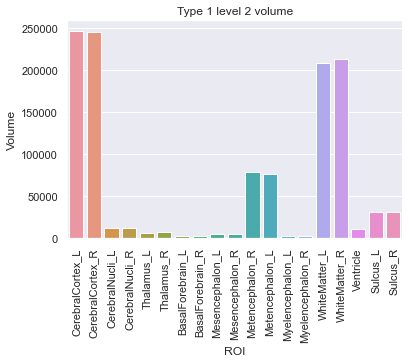

In [15]:
g = sns.barplot(x='roi', y = 'volume', data = t1l2)
## this is the matplotlib command for rotating 
## axis tick labels by 90 degrees.
plt.xticks(rotation = 90)
matplotlib.rc('xtick', labelsize=10) 
matplotlib.rc('ytick', labelsize=10) 
plt.ylabel("Volume")
plt.xlabel("ROI")
plt.title("Type 1 level 2 volume")

Text(0.5, 1.0, 'Type 1 level 3 volume')

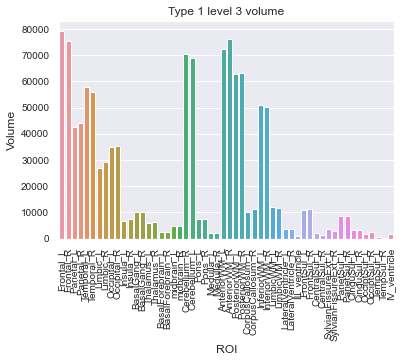

In [16]:
import matplotlib 
g = sns.barplot(x='roi', y = 'volume', data = t1l3)
## this is the matplotlib command for rotating 
## axis tick labels by 90 degrees.
plt.xticks(rotation = 90)
matplotlib.rc('xtick', labelsize=6) 
matplotlib.rc('ytick', labelsize=6)
plt.ylabel("Volume")
plt.xlabel("ROI")
plt.title("Type 1 level 3 volume")

In [17]:
t1l23pivot = t1l23.pivot(index='level',columns = 'roi', values = 'volume')
t1l23pivot.head()

roi,AnteriorWM_L,AnteriorWM_R,BasalForebrain_L,BasalForebrain_R,BasalGang_L,BasalGang_R,CentralSul_L,CentralSul_R,Cerebellum_L,Cerebellum_R,...,TempSul_R,Temporal_L,Temporal_R,Thalamus_L,Thalamus_R,Ventricle,WhiteMatter_L,WhiteMatter_R,midbrain_L,midbrain_R
level,,,,,,,,,,,,,,,,,,,,,
2,NaN,NaN,2686.0,2609.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,6116.0,6446.0,10388.0,208432.0,212651.0,NaN,NaN
3,72167.0,76270.0,2686.0,2609.0,10250.0,10284.0,2043.0,1476.0,68870.0,70304.0,...,387.0,58034.0,55776.0,6116.0,6446.0,NaN,NaN,NaN,4842.0,4722.0


**plot Type 1 Level 2 data and Type 1 Level 3 data on the same graph

Text(0.5, 1.0, 'Type 1 level 2 and type 1 level 3 volume')

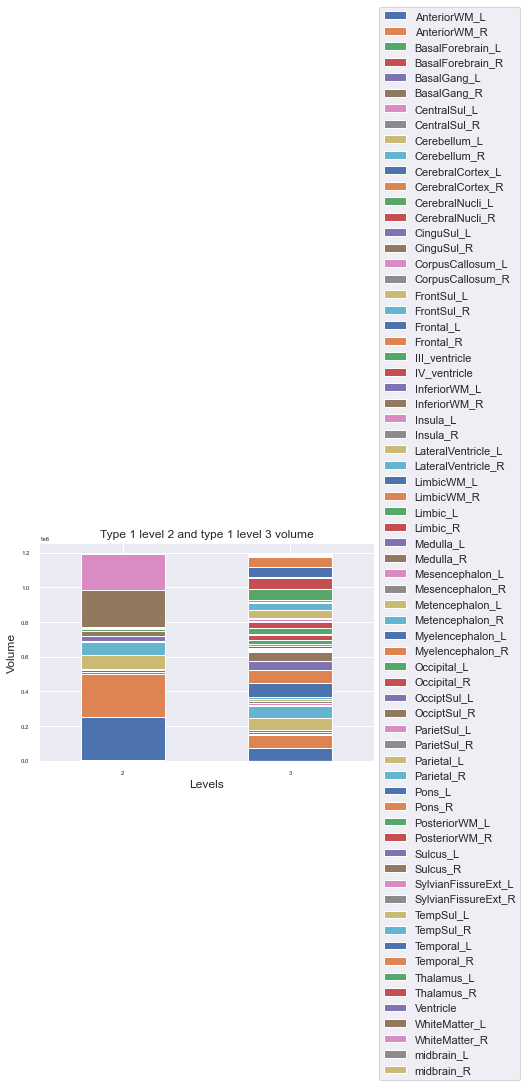

In [18]:
t1l23pivot.plot(kind='bar', stacked=True, legend= False)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 1.0))
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=10)
plt.xticks(rotation = 0)
plt.ylabel("Volume")
plt.xlabel("Levels")
plt.title("Type 1 level 2 and type 1 level 3 volume")

       Unnamed: 0             rawid               roi  volume   min    max  \
12548       12549  kirby906a_ax.img  CerebralCortex_L  246947   2.0  342.0   
12549       12550  kirby906a_ax.img  CerebralCortex_R  245855   2.0  330.0   
12550       12551  kirby906a_ax.img   CerebralNucli_L   11685  73.0  303.0   
12551       12552  kirby906a_ax.img   CerebralNucli_R   11982  80.0  311.0   
12552       12553  kirby906a_ax.img        Thalamus_L    6116  60.0  296.0   

           mean      std  type  level   id      icv      tbv  
12548  121.0478  32.5322     1      2  906  1195015  1123076  
12549  124.9482  32.8817     1      2  906  1195015  1123076  
12550  201.6180  29.3502     1      2  906  1195015  1123076  
12551  205.2413  29.8681     1      2  906  1195015  1123076  
12552  225.7953  23.6876     1      2  906  1195015  1123076  


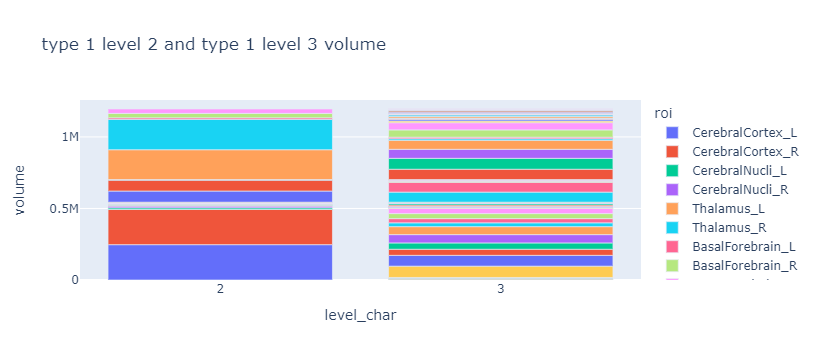

<Figure size 432x288 with 0 Axes>

In [20]:
#Another plot:
print(t1l23.head())
t1l23a = t1l23.assign(level_char = t1l23.level.astype(str))
fig = px.bar(t1l23a, x = "level_char", y = "volume", color = "roi", title=" type 1 level 2 and type 1 level 3 volume" )
fig.show()
plt.savefig('question1.png')


_question2_:

Create bar plots of year and program.

In [21]:
import pandas as pd
import plotly.express as px
import numpy as np

In [22]:
## import dataset
url = "https://raw.githubusercontent.com/bcaffo/ds4ph-bme/master/data/classInterests.txt"
aa = pd.read_csv(url, sep = "\t")
aa.head(2)

,Year,Program
0,Master's,BME
1,Master's,BME


In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
aa["id"] = aa.index + 1

ax= aa.groupby(['Year','Program'])['id'].count().reset_index(name="count")
print(ax.head())
matplotlib.rc('xtick', labelsize=10) 
matplotlib.rc('ytick', labelsize=10) 

       Year            Program  count
0    Junior                BME      3
1  Master's                BME     29
2  Master's             ChemBE      1
3  Master's          JHSPH-MMI      1
4  Master's  Materials_Science      1


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Junior'),
  Text(1, 0, "Master's"),
  Text(2, 0, 'PhD'),
  Text(3, 0, 'Senior'),
  Text(4, 0, 'Sophomore')])

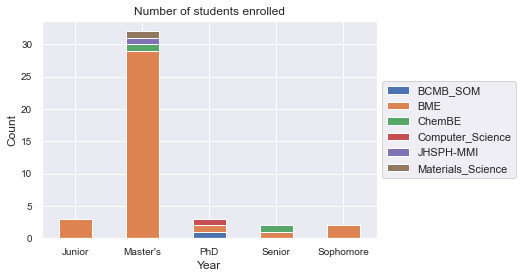

In [26]:

axpivot = ax.pivot(index = 'Year', columns = 'Program', values = 'count')
axpivot.plot(kind='bar', stacked=True, legend= False)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.ylabel("Count")
plt.xlabel("Year")
plt.title("Number of students enrolled")
plt.xticks(rotation = 0)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'BCMB_SOM'),
  Text(1, 0, 'BME'),
  Text(2, 0, 'ChemBE'),
  Text(3, 0, 'Computer_Science'),
  Text(4, 0, 'JHSPH-MMI'),
  Text(5, 0, 'Materials_Science')])

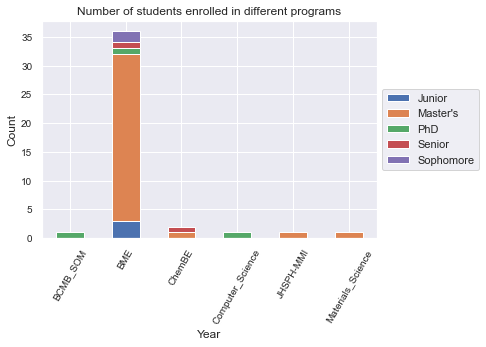

In [27]:
axpivot = ax.pivot(index = 'Program', columns = 'Year', values = 'count')
axpivot.plot(kind='bar', stacked=True, legend= False)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.ylabel("Count")
plt.xlabel("Year")
plt.title("Number of students enrolled in different programs")
plt.xticks(rotation =60)

        Year  count
0     Junior      3
1   Master's     32
2        PhD      3
3     Senior      2
4  Sophomore      2


Text(0.5, 1.0, 'Students by Class Year')

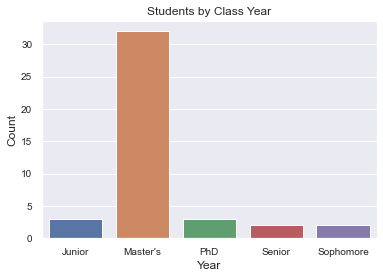

In [41]:
axr = ax.groupby(["Year"], as_index=False).sum()
print(axr)

g = sns.barplot(x='Year', y = 'count', data = axr)
plt.ylabel("Count")
plt.xlabel("Year")
plt.title("Students by Class Year")

             Program  count
0           BCMB_SOM      1
1                BME     36
2             ChemBE      2
3   Computer_Science      1
4          JHSPH-MMI      1
5  Materials_Science      1


Text(0.5, 1.0, 'Students by Program')

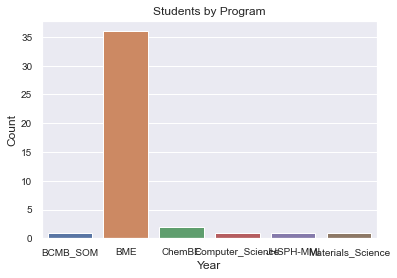

In [42]:
axt = ax.groupby(["Program"], as_index=False).sum()
print(axt)

g = sns.barplot(x='Program', y = 'count', data = axt)
plt.ylabel("Count")
plt.xlabel("Year")
plt.title("Students by Program")

#question3
Information about the data can be found in the sample info here. From the gene expression data matrix, subtract the rowmean from each row and the column mean from each column so that you have a new matrix that has been demeaned across both rows and columns. Divide each column by its standard deviation.

In [21]:
gene=pd.read_csv("https://raw.githubusercontent.com/jhu-advdatasci/2018/master/data/GSE5859_exprs.csv")
gene = gene.drop(['Unnamed: 0'], axis = 1)
gene.head()

,GSM25581.CEL.gz,GSM25681.CEL.gz,GSM136524.CEL.gz,GSM136707.CEL.gz,GSM25553.CEL.gz,GSM136676.CEL.gz,GSM136711.CEL.gz,GSM136542.CEL.gz,GSM136535.CEL.gz,GSM25399.CEL.gz,...,GSM48650.CEL.gz,GSM25687.CEL.gz,GSM25685.CEL.gz,GSM136549.CEL.gz,GSM25427.CEL.gz,GSM25525.CEL.gz,GSM25349.CEL.gz,GSM136727.CEL.gz,GSM25626.CEL.gz,GSM136725.CEL.gz
0,6.333951,5.736190,6.156754,6.513010,6.061013,6.506493,6.863426,6.369645,6.646321,5.810930,...,7.082636,6.315866,7.010165,6.460107,6.122355,6.330314,6.627014,6.133068,6.419444,6.488579
1,7.255622,7.399993,7.491967,7.006123,7.250995,7.082581,6.842236,7.048487,7.042361,6.666625,...,6.599718,7.412731,7.274429,6.928642,7.168782,7.235648,6.939184,7.280781,6.351776,7.517410
2,5.760106,4.825169,5.039387,5.414160,5.205697,5.300078,5.099337,5.156459,5.736109,5.807496,...,6.231457,5.240717,5.275062,5.759827,5.409720,5.491938,5.113570,5.401876,5.537605,5.247190
3,6.935451,7.025210,7.543667,7.959781,7.223323,8.006816,8.102504,7.434617,7.532321,7.711461,...,8.215096,7.677593,7.923624,7.219401,7.432338,6.785174,7.833862,7.607461,7.302935,7.331864
4,3.597872,3.108801,3.128269,3.364947,3.125909,3.186834,3.311022,3.092042,3.167737,2.969579,...,3.331424,3.043856,3.151900,3.132253,3.250600,2.984125,3.152269,3.225123,3.222731,3.175846


In [22]:

#the mean of each row
print(gene.mean(axis=1))
dm=gene.sub(gene.mean(axis=1),axis=0)

#the mean of each column
print(gene.mean(axis=0))
d2m=dm.sub(dm.mean(axis=0),axis=1)

#divided by column std
final=d2m.div(dm.std(axis=0), axis=1)
final.head()

0        6.383263
1        7.091630
2        5.477032
3        7.584042
4        3.197687
          ...    
8788     7.131029
8789    10.586014
8790     9.981918
8791     5.666661
8792     6.105529
Length: 8793, dtype: float64
GSM25581.CEL.gz     5.703998
GSM25681.CEL.gz     5.721779
GSM136524.CEL.gz    5.726300
GSM136707.CEL.gz    5.743632
GSM25553.CEL.gz     5.835499
                      ...   
GSM25525.CEL.gz     5.707259
GSM25349.CEL.gz     5.737331
GSM136727.CEL.gz    5.739754
GSM25626.CEL.gz     5.723726
GSM136725.CEL.gz    5.744122
Length: 208, dtype: float64


,GSM25581.CEL.gz,GSM25681.CEL.gz,GSM136524.CEL.gz,GSM136707.CEL.gz,GSM25553.CEL.gz,GSM136676.CEL.gz,GSM136711.CEL.gz,GSM136542.CEL.gz,GSM136535.CEL.gz,GSM25399.CEL.gz,...,GSM48650.CEL.gz,GSM25687.CEL.gz,GSM25685.CEL.gz,GSM136549.CEL.gz,GSM25427.CEL.gz,GSM25525.CEL.gz,GSM25349.CEL.gz,GSM136727.CEL.gz,GSM25626.CEL.gz,GSM136725.CEL.gz
0,-0.062810,-1.694428,-0.797346,0.362538,-1.152413,0.366177,1.252187,-0.054154,1.008166,-0.730639,...,1.446603,-0.185273,1.615970,0.245537,-0.568262,-0.069236,0.617954,-0.598607,0.088393,0.257410
1,0.484259,0.835005,1.434085,-0.316432,0.141554,-0.076237,-0.745136,-0.148166,-0.250652,-0.497815,...,-1.094982,0.985940,0.538265,-0.521649,0.195814,0.365237,-0.422815,0.408542,-1.573530,1.173822
2,0.789673,-1.707110,-1.548943,-0.245036,-1.015618,-0.637799,-1.096388,-1.031533,0.992122,0.696068,...,1.564055,-0.694512,-0.395453,0.904341,-0.130702,0.080440,-0.977132,-0.197351,0.140632,-0.701024
3,-1.599798,-1.460817,-0.134750,1.138467,-1.255766,1.368016,1.357039,-0.486577,-0.260531,0.375192,...,1.300847,0.299944,0.918732,-1.166704,-0.321440,-1.714599,0.633897,0.028623,-0.591095,-0.764897
4,1.090032,-0.216675,-0.238137,0.480868,-0.479461,-0.082265,0.247916,-0.347177,-0.172784,-0.186654,...,0.239831,-0.445844,-0.016443,-0.209588,0.141031,-0.423519,-0.141661,0.037831,0.064544,-0.106213


#question 4
Create plots of healthcare spending versus time color coded by states.

In [23]:
import pandas as pd
import numpy as np
import matplotlib as mpl
spending = pd.read_csv("https://raw.githubusercontent.com/jhu-advdatasci/2018/master/data/KFF/healthcare-spending.csv", skiprows=2)
spending.drop(spending.index[range(52, 64)], axis=0, inplace=True)

year = list(range(1991,2015))
l = 'location'
head=np.append([l], year)
spending.columns = head
spending.head()

,location,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,United States,675896.0,731455.0,778684.0,820172.0,869578.0,917540.0,969531.0,1026103.0,1086280.0,...,1696222.0,1804672.0,1918820.0,2010690.0,2114221.0,2194625.0,2272582.0,2365948.0,2435624.0,2562824.0
1,Alabama,10393.0,11284.0,12028.0,12742.0,13590.0,14450.0,15462.0,15860.0,16451.0,...,25338.0,26638.0,27700.0,28765.0,30095.0,30728.0,31398.0,32848.0,33788.0,35263.0
2,Alaska,1458.0,1558.0,1661.0,1728.0,1879.0,2076.0,2240.0,2386.0,2569.0,...,4765.0,5048.0,5426.0,5807.0,6112.0,6519.0,6928.0,7406.0,7684.0,8151.0
3,Arizona,9269.0,9815.0,10655.0,11364.0,12042.0,12850.0,13418.0,14465.0,15550.0,...,28190.0,30766.0,33366.0,35547.0,37258.0,38620.0,39295.0,40495.0,41481.0,43356.0
4,Arkansas,5632.0,6022.0,6397.0,6810.0,7343.0,7817.0,8393.0,8814.0,9407.0,...,14611.0,15431.0,16426.0,17246.0,18071.0,18735.0,19356.0,20076.0,20500.0,21980.0


In [24]:
# Melt the DataFrame
long = pd.melt(spending, 
                       id_vars='location', 
                       value_vars=spending.columns[1:], 
                       var_name='Year', 
                       value_name='Spending')

print(long.head())
long.location.unique().shape


        location  Year  Spending
0  United States  1991  675896.0
1        Alabama  1991   10393.0
2         Alaska  1991    1458.0
3        Arizona  1991    9269.0
4       Arkansas  1991    5632.0


(52,)

In [25]:
long.head()
longd1 = long.loc[long.location != 'United States']
longd1.location.unique().shape
longd1.head()

,location,Year,Spending
1,Alabama,1991,10393.0
2,Alaska,1991,1458.0
3,Arizona,1991,9269.0
4,Arkansas,1991,5632.0
5,California,1991,81438.0


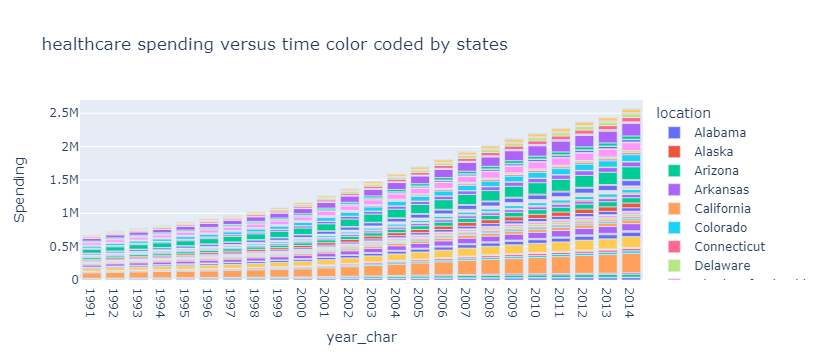

<Figure size 432x288 with 0 Axes>

In [47]:
%matplotlib inline
longd1 = longd1.assign(year_char = longd1.Year.astype(str))
fig = px.bar(longd1, x = "year_char", y = "Spending", color = "location", title="healthcare spending versus time color coded by states" )
fig.show()
plt.savefig('question4a.png')

location  Alabama  Alaska  Arizona  Arkansas  California  Colorado  \
Year                                                                 
1991      10393.0  1458.0   9269.0    5632.0     81438.0    8460.0   
1992      11284.0  1558.0   9815.0    6022.0     87949.0    9215.0   
1993      12028.0  1661.0  10655.0    6397.0     91963.0    9803.0   
1994      12742.0  1728.0  11364.0    6810.0     94245.0   10382.0   

location  Connecticut  Delaware  District of Columbia  Florida  ...  \
Year                                                            ...   
1991          10950.0    1938.0                2800.0  39430.0  ...   
1992          11635.0    2111.0                3098.0  43041.0  ...   
1993          12081.0    2285.0                3240.0  46123.0  ...   
1994          12772.0    2489.0                3255.0  48886.0  ...   

location  South Dakota  Tennessee    Texas    Utah  Vermont  Virginia  \
Year                                                                    
1991  

Text(0.5, 1.0, 'healthcare spending versus time color coded by states')

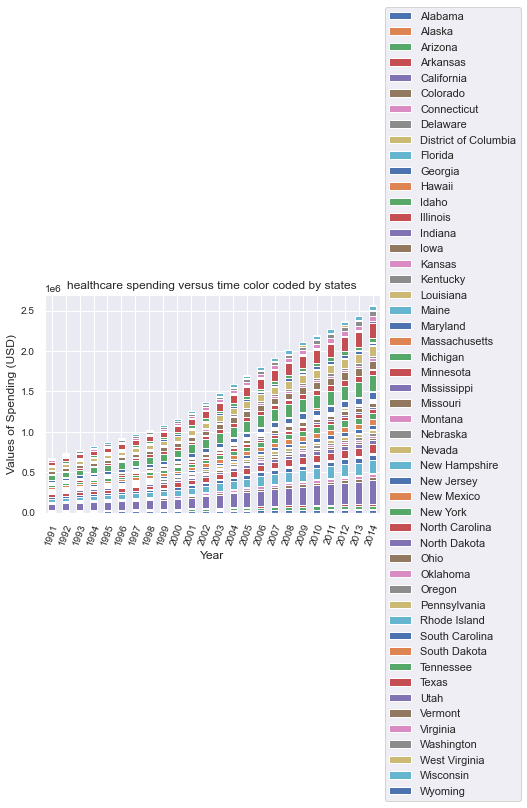

In [28]:
longpivot = longd1.pivot(index = 'Year', columns = 'location', values = 'Spending')
print(longpivot.head(4))

longpivot.plot(kind='bar', stacked=True, legend= False)
plt.ylabel("Values of Spending (USD)")
plt.xlabel("Year")
plt.xticks(rotation = 70)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title("healthcare spending versus time color coded by states")

#5.Refer to the previous data. Create a barplot of average health care spending by state.

In [49]:
average = longd1.groupby('location')['Spending'].mean().reset_index(name='avg')
print(average.head())
print(longd1.head())

     location            avg
0     Alabama   21976.708333
1      Alaska    4141.541667
2     Arizona   24176.083333
3    Arkansas   12823.625000
4  California  165824.708333
     location  Year  Spending year_char
1     Alabama  1991   10393.0      1991
2      Alaska  1991    1458.0      1991
3     Arizona  1991    9269.0      1991
4    Arkansas  1991    5632.0      1991
5  California  1991   81438.0      1991


In [50]:
# Quick Check
ff = longd1.loc[longd1.location=='Alabama']
nn = ff.assign(avgs = (sum(ff.Spending)/24))
nn.head()

,location,Year,Spending,year_char,avgs
1,Alabama,1991,10393.0,1991,21976.708333
53,Alabama,1992,11284.0,1992,21976.708333
105,Alabama,1993,12028.0,1993,21976.708333
157,Alabama,1994,12742.0,1994,21976.708333
209,Alabama,1995,13590.0,1995,21976.708333


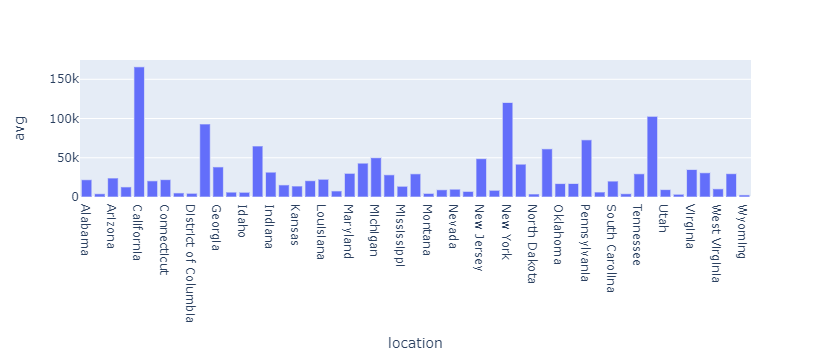

<Figure size 432x288 with 0 Axes>

In [52]:
myplot=px.bar(average,x="location", y="avg")
myplot.show()
plt.savefig('question5.png')

question5.another plot

Text(0.5, 1.0, 'Average Annual Spending by States, US, 1991-2014 ')

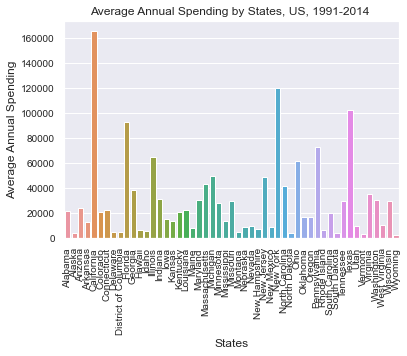

In [53]:

g = sns.barplot(x='location', y = 'avg', data = average)
plt.xticks(rotation = 90)
plt.ylabel("Average Annual Spending")
plt.xlabel("States")
plt.title("Average Annual Spending by States, US, 1991-2014 ")
